# Simulation statistics analysis notebook

> Author: Benjamin Eder

This notebook outputs plots to analyze the statistic logs of the stream simulator.

In [275]:
import matplotlib.pylab as plt
import numpy as np
import glob
import pandas as pd
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
import ntpath

In [276]:
### CONFIGURATION
STATS_FILE_PATTERN = 'logs/rimea4/strength/**/sim_log*_stats.csv'
WEIDMANN_DATA_FILE = 'weidmann.txt'
HANKIN_DATA_FILE = 'hankin_schoolboys.txt'

# Preparation

In [277]:
files = glob.glob(STATS_FILE_PATTERN)
print('Found batch result files:', files)

Found batch result files: ['logs/rimea4/strength\\infinite_strength\\sim_log1_stats.csv', 'logs/rimea4/strength\\low_strength\\sim_log1_stats.csv', 'logs/rimea4/strength\\strength_5\\sim_log1_stats.csv']


In [278]:
DFS = []
for file in files:
    DF = pd.read_csv(file, sep=';')
    DFS.append(DF)

In [279]:
i = 1
for DF in DFS:
    lastPeopleCount = list(DF['PeopleCount'].tail(1))[0]
    lastDensity = list(DF['Density'].tail(1))[0]
    lastMeanSpeed = list(DF['MeanSpeed'].tail(1))[0]
    lastFlow = list(DF['Flow'].tail(1))[0]
    
    print(f"File {i} {files[i-1]} - People count: {lastPeopleCount}, Density: {lastDensity}, MeanSpeed: {lastMeanSpeed}, Flow: {lastFlow}")
    i += 1

File 1 logs/rimea4/strength\infinite_strength\sim_log1_stats.csv - People count: 4493, Density: 5.813923, MeanSpeed: 0.204605, Flow: 0.9833290000000001
File 2 logs/rimea4/strength\low_strength\sim_log1_stats.csv - People count: 4607, Density: 5.961439, MeanSpeed: 0.20441900000000002, Flow: 0.9666620000000001
File 3 logs/rimea4/strength\strength_5\sim_log1_stats.csv - People count: 4802, Density: 6.213768, MeanSpeed: 0.10462300000000001, Flow: 0.13333299999999998


In [280]:
WEIDMANN = pd.read_csv(WEIDMANN_DATA_FILE, delim_whitespace=True)
WEIDMANN.columns = ['Density', 'MeanSpeed']

In [281]:
HANKIN = pd.read_csv(HANKIN_DATA_FILE, delim_whitespace=True)

In [282]:
WEIDMANN_SPEED = list(WEIDMANN['MeanSpeed'])
WEIDMANN_DENSITY = list(WEIDMANN['Density'])

In [283]:
HANKIN_SPEED = list(HANKIN['MeanSpeed'])
HANKIN_DENSITY = list(HANKIN['Density'])

# Plotting

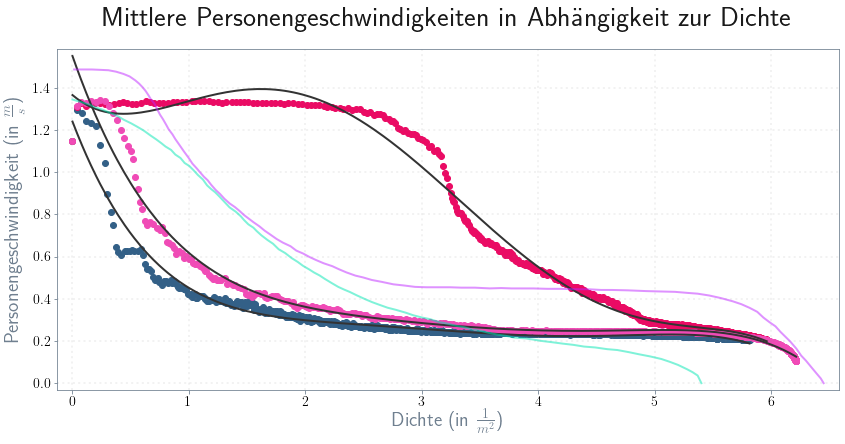

In [284]:
from matplotlib.pylab import rc
rc('font',**{'family':'sans-serif','sans-serif':['Bahnschrift']})
rc('text', usetex=True)

fig, axes = plt.subplots(1, figsize=(14, 7))

axes.set_title('Mittlere Personengeschwindigkeiten in Abhängigkeit zur Dichte', fontsize=28, color=(0.1, 0.1, 0.1))
axes.title.set_position([.5, 1.05])

i = 0
for DF in DFS:
    MEANSPEED = list(DF['MeanSpeed'])
    DENSITY = list(DF['Density'])
    FLOW = list(DF['Flow'])
    TIME = list(DF['Time'])

    ctup = (1.0, 0.2, 0.4, 0.3)
    color = ctup if len(files) == 1 else np.random.rand(3,)
    
    axes.scatter(DENSITY, MEANSPEED, color=color, label='Simulator (Datenpunkte)')

    # LINEAR REGRESSION

    regr_x = np.array(DENSITY).reshape(-1, 1)
    regr_y = np.array(MEANSPEED).reshape(-1, 1)

    poly = PolynomialFeatures(degree=5)
    regr_x = poly.fit_transform(regr_x)
    regr = linear_model.LinearRegression()

    regr.fit(regr_x, regr_y)
    meanspeed_pred = regr.predict(regr_x)

    axes.plot(DENSITY, meanspeed_pred, color=(0.2, 0.2, 0.2), linewidth=2, label=f'Simulator (Lineare Regression)')
    
    i += 1



# PLOT WEIDMANN REFERENCE DATA
axes.plot(WEIDMANN_DENSITY, WEIDMANN_SPEED, color=(0.0, 0.9, 0.7, 0.5), label='Weidmann', linewidth=2)

# PLOT HANKIN & WRIGHT REFERENCE DATA
axes.plot(HANKIN_DENSITY, HANKIN_SPEED, color=(0.75, 0.15, 1.0, 0.5), label='Hankin \& Wright (Schoolboys)', linewidth=2)



axes.set_ylabel('Personengeschwindigkeit (in \(\\frac{m}{s}\))', fontsize=20, color='slategrey')
axes.set_xlabel('Dichte (in \(\\frac{1}{m^2}\))', fontsize=20, color='slategrey')

if len(files) == 1:
    axes.legend(fontsize=16)

axes.grid(color='grey', linestyle='dotted', linewidth=2, alpha=0.1)

axes.margins(0.02)

plt.setp(axes.spines.values(), color='slategrey')
plt.setp([axes.get_xticklines(), axes.get_yticklines()], color='slategrey')
axes.tick_params(axis='both', which='major', labelsize=14)
axes.tick_params(axis='both', which='minor', labelsize=12)

fig.subplots_adjust(top=0.8)

fig.savefig('out/mean_speed_as_a_function_of_density.pdf')  

Der eckige Anfang der Kurve kommt vermutlich daher, dass unsere Personen alle die gleichen Mollifier Einstellungen haben

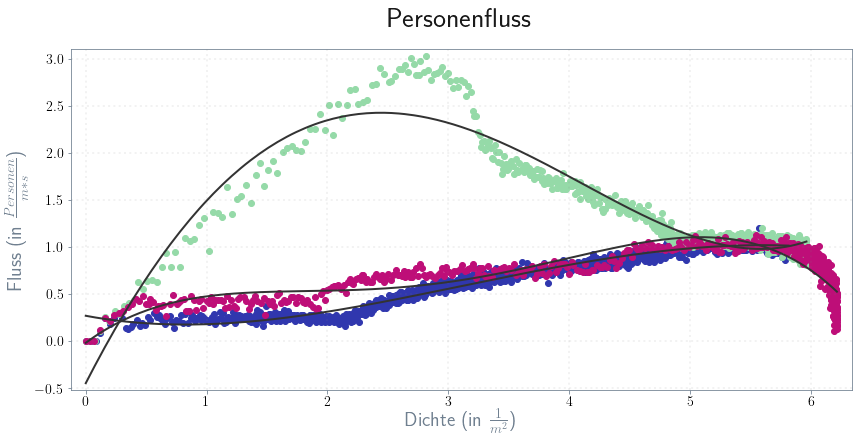

In [285]:
fig, axes = plt.subplots(1, figsize=(14, 7))

axes.set_title('Personenfluss', fontsize=28, color=(0.1, 0.1, 0.1))
axes.title.set_position([.5, 1.05])


for DF in DFS:
    MEANSPEED = list(DF['MeanSpeed'])
    DENSITY = list(DF['Density'])
    FLOW = list(DF['Flow'])
    TIME = list(DF['Time'])
    
    ctup = (1.0, 0.2, 0.4, 0.3)
    color = ctup if len(files) == 1 else np.random.rand(3,)

    axes.scatter(DENSITY, FLOW, color=color)

    regr_x = np.array(DENSITY).reshape(-1, 1)
    regr_y = np.array(FLOW).reshape(-1, 1)

    poly = PolynomialFeatures(degree=4)
    regr_x = poly.fit_transform(regr_x)
    regr = linear_model.LinearRegression()

    regr.fit(regr_x, regr_y)
    meanspeed_pred = regr.predict(regr_x)

    axes.plot(DENSITY, meanspeed_pred, color=(0.2, 0.2, 0.2), linewidth=2)




axes.set_ylabel('Fluss (in \(\\frac{Personen}{m*s}\))', fontsize=20, color='slategrey')
axes.set_xlabel('Dichte (in \(\\frac{1}{m^2}\))', fontsize=20, color='slategrey')

# axes.legend(fontsize=16)

axes.grid(color='grey', linestyle='dotted', linewidth=2, alpha=0.1)

axes.margins(0.02)

plt.setp(axes.spines.values(), color='slategrey')
plt.setp([axes.get_xticklines(), axes.get_yticklines()], color='slategrey')
axes.tick_params(axis='both', which='major', labelsize=14)
axes.tick_params(axis='both', which='minor', labelsize=12)

fig.subplots_adjust(top=0.8)

fig.savefig('out/pedestrian_flow.pdf')  